# Some practice on Causal Inference

source: https://github.com/cerquide/propensity_score_talk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv("sample.csv").fillna(0)
df['alive'] = (1 - df['dead']).astype(int)
df.drop(columns=['dead'], inplace=True)
df

,smoker,treatment,alive
0,0,0,1
1,1,1,1
2,1,1,1
3,0,1,1
4,0,0,1
...,...,...,...
230689,0,1,1
230690,0,0,1
230691,1,1,0
230692,0,0,0


<AxesSubplot:ylabel='alive'>

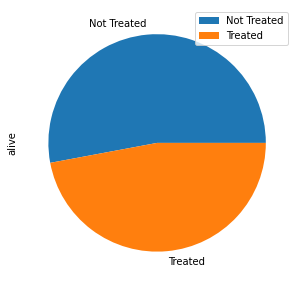

In [3]:
df_grouped_by_treatment = df.groupby(by='treatment').mean()
df_grouped_by_treatment.index = ['Not Treated', 'Treated']
df_grouped_by_treatment.plot.pie(y='alive', figsize=(5, 5))


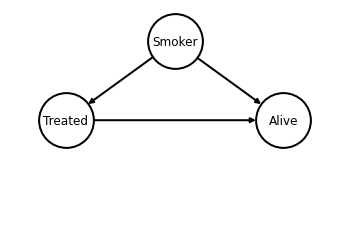

In [4]:
G = nx.DiGraph([(0, 1), (2, 0), (2, 1)])

labeldict = {0: 'Treated', 1:'Alive', 2: 'Smoker'}

# group nodes by column
left_nodes = [0]
middle_nodes = [2]
right_nodes = [1]

options = {
    "font_size": 12,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}

# set the position according to column (x-coord)
pos = {0: (0, 0), 2: (1, 0.01), 1: (2, 0)}

nx.draw_networkx(G, pos, labels=labeldict, with_labels = True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [5]:
def average_treatment_effect(df, target='alive'):
    df_treated = df[df["treatment"]==1]
    df_not_treated = df[df["treatment"]==0]

    return (df_treated.mean() - df_not_treated.mean())[target]

In [6]:
# ATE without considering confounding variables

average_treatment_effect(df)*100

-8.484338460046793

In [7]:
# ATE conditioned on confounding variables

df_smoker = df[df["smoker"]==1]
df_non_smoker = df[df["smoker"]==0]

ratio_of_smokers = len(df[df["smoker"]==1]) / len(df)

ATE_smokers = average_treatment_effect(df_smoker)
ATE_non_smokers = average_treatment_effect(df_non_smoker)
      
ATE = (ratio_of_smokers * ATE_smokers) + ((1-ratio_of_smokers) * ATE_non_smokers)

ATE_smokers*100, ATE_non_smokers*100, ATE*100

(30.346815914873847, -1.239549399325568, 8.27603928788013)